   #                                    FINAL DATA ANALYSIS - MAIN REPORT
   
   
   ## Table of Contents
   ###      1. [Introduction](#Introduction)
   ###      2. [Pre-processing and Data Preparation](#Pre-processing and Data Preparation)
               + Data Cleaning
               + Dummy Variable Transformation for Regression
               + Normalization for Clustering
               + Binning Happiness Score for Classification
   ###      3. [Data Exploration](#Data Exploration)
               + Descriptive Statistics
               + Correlation Analysis
               + Distributions and Relationships
               + Outlier Detection
               
   ###      4. [Data Visualization](#Data Visualization)
               + World Happiness Score Heat Map
               + Happiness Score Accross Regions Bar Graph
               + Pie Distribution Share of Happiness Bin by Region
   ###      5. [Machine Learning Application](#Machine Learning Application)
               + Supervised Learning
                   -  Multiple Linear Regression
                   -  Multiple Linear Regression (With Feature Selection)
                   -  Ridge Regression
                   -  Decision Tree Classification
                   -  Model Evaluation and Comparison
               + Unsupervised Learning
                   -  K-Means Clustering (Original Data)
                   -  K-Means Clustering (With Z-score Normalization)
                   -  K-Means Clustering (PCA)
                   -  Model Evaluation and Comparison
   ###      6. [Conclusion](#Conclusion)

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1. Introduction <a id='Introduction'></a>

In this project, I will perform the data analysis, visualization and apply multiple machine learning algorithms on the 2017 World Happiness Report data from Kaggle: (https://www.kaggle.com/unsdsn/world-happiness ). It is the happiness rank and scores referenced in many media outlets that suggest that North Islandic (Western European) countries are among the happiest in the world. It contains 155 rows/countries and 12 columns. The column descriptions in the file are as follows:

    + Country - Name of the country.
    + Region - Region the country belongs to.
    + Happiness Rank - Rank  of the country based on the Happiness Score.
    + Happiness Score - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
    + Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score.
    + Family - The extent to which Family contributes to the calculation of the Happiness Score
    + Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score
    + Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.
    + Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score.
    + Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.
    + Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

I will attempt to predict and uncover through the application of multiple regression models, the underlying algorithm used to score the happiness of individual countries in the data. Furthermore, I will apply decision tree (Supervised learning) algorithms to identify the characteristics that are most important in classifying countries as very happy, content, and unhappy. Lastly, I will apply the K-means clustering (Unsupervised learning) algorithm to to segregate groups with similar traits and assign them into clusters (countries designated as very happy, content, and unhappy). 

# 2. Data Pre-processing and Preparation 
<a id='Pre-processing and Data Preparation'> </a>

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import graphviz
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import preprocessing
from sklearn import decomposition

Populating the interactive namespace from numpy and matplotlib


C:\Users\Yous\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



### Data Cleaning


In [2]:
#Import the 2017 World Happiness data
happy_2017 = pd.read_csv("2017.csv")

In [3]:
#The top 5 countries by Happiness score
happy_2017.head()

,Country,Region,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
#the shape of the data
happy_2017.shape

(155, 13)

In [5]:
#The last 5 countries by Happiness score
happy_2017.tail()

,Country,Region,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
150,Rwanda,Sub-Saharan Africa,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,Middle East and Northern Africa,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,Sub-Saharan Africa,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,Sub-Saharan Africa,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,Sub-Saharan Africa,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


We can notice already that the region in which countries are located in the world play a major role in the their happiness score or rank. The top 5 happiest countries in 2017 are all located in Western Europe while the 5 least happiest countries are *mostly* located in Sub-Saharian Africa.

In [6]:
#Get column data types
happy_2017.dtypes

Country                         object
Region                          object
Happiness_Rank                   int64
Happiness_Score                float64
Whisker_high                   float64
Whisker_low                    float64
Economy_GDP_per_Capita         float64
Family                         float64
Health_Life_Expectancy         float64
Freedom                        float64
Generosity                     float64
Trust_Government_Corruption    float64
Dystopia_Residual              float64
dtype: object

All of the attributes are continuous except for *Region* and *Country*. For the purpose of performing regression on my data, I will create a new continuous dataset. First, I will drop *Happiness_Rank* from my continuous dataset because it is based on the *Happiness_Score* and will introduce multicollinearity in my model (See correlation matrix below). Second, I will drop the *Country* variable as it is pretty much an idex of no importance. Lastly, I will also drop *Whisker_high* and *Whisker_low* as they are not real attributes. They represent the tail ends of the whisker or the range in which the estimate is certain to fall in. Please see the correlation matrix below for proof.

In [7]:
#drop useless attributes.
new_happiness_data=happy_2017.drop(columns=['Happiness_Rank', 'Country', 'Whisker_high', 'Whisker_low'])

This is the dataset that I will use for all the machine learnig algorithms including the modified versions such as the datasets with bins and normalized data.

In [8]:
#Display the newly created dataframe
new_happiness_data.head()

,Region,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
0,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### Dummy variable transformation for regression

Next, I will transform categorical attributes into *continuous* dummy variable in my dataset for regression. This will turn values in the only categorical column in my dataset (*Region*) into dummy variables.

In [9]:
#Store new continuous dataset for multiple regression/ridge regression
continuous_happy = pd.get_dummies(new_happiness_data)
continuous_happy.head(10)

,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0,0,0,0,0,0,0,0,0,1
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0,0,0,0,0,0,0,0,0,1
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0,0,0,0,0,0,0,0,0,1
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0,0,0,0,0,0,0,0,0,1
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0,0,0,0,0,0,0,0,0,1
5,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,0,0,0,0,0,0,0,0,0,1
6,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,0,0,0,0,0,1,0,0,0,0
7,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,1,0,0,0,0,0,0,0,0,0
8,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,0,0,0,0,0,0,0,0,0,1
9,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,1,0,0,0,0,0,0,0,0,0


### Normalization for Clustering

On the other hand, I will store a normalized version of my data in order to bring all the variable on the same scale and avoid any from dominating the others. The normalization method I will be using is Z-score normalization instead of min-max normalization because it is able to handle outliers better.

*Note:* I cleaned the original data in excel in order to make a matrix version of the new_happiness_data (Minus categorical values).

In [10]:
#Import Matrix
data = pd.read_csv('2017_matrix.csv', header=None) #edited new_happiness_data in excel to remove column name and deleted the "Region"
#Z-score equation
zscore = lambda x: ((x - x.mean()) / x.std()) if (x.dtypes==np.float64 or x.dtypes==np.int64) else x
#Make a copy of matrix data
z_happy = data.copy()
#Apply Z-score equation to matrix data
z_happy= z_happy.apply(zscore)
#View z-score applied to data
z_happy.head()

,0,1,2,3,4,5,6,7
0,1.929741,1.501321,1.199688,1.034812,1.510938,0.854195,1.896935,0.853529
1,1.916481,1.182684,1.260949,1.017514,1.448164,0.804249,2.731145,0.926887
2,1.900569,1.178525,1.467911,1.190400,1.455871,1.696514,0.299097,0.944901
3,1.891729,1.378972,1.141860,1.294078,1.408589,0.323978,2.399032,0.852908
4,1.869629,1.090451,1.223092,1.087501,1.394458,-0.010392,2.552526,1.159822


In [11]:
#Store a feature variable of the matrix
features = new_happiness_data.iloc[:0,1:]
#Store a target variable for the matrix
target = pd.qcut(new_happiness_data.Happiness_Score, [0, .33, .66, 1], labels=["2", "1", "0"])

In [12]:
#Transpose the features or column names
features.T

""
Happiness_Score
Economy_GDP_per_Capita
Family
Health_Life_Expectancy
Freedom
Generosity
Trust_Government_Corruption
Dystopia_Residual


For clustering purposes, I transformed the binned classes (explained in next section) into numerical categories.

Classes: 0= *Very Happy*, 1= *Cotent*, 2= *Unhappy*

In [13]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Happiness_Score, dtype: category
Categories (3, object): [2 < 1 < 0]

### Binning happiness score for classification

For the decision tree classification, I will bin the target variable (*Happiness_Score*) into 3 bucket categories: Very Happy = top 33% of countries by Happiness_Scrore, Content = middle 33% of countries by Happiness_Scrore, and Unhappy = lowest 33% of countries by Happiness_Scrore. This will give me the ability to predict in which category a country is likely to fall in given the decision the rules of the decision tree. Escentially, I will build 3 decision trees: one that is able to predict a Very Happy country, a Content country, and an Unhappy country respectively.

In [14]:
#Create a dataset with categorical attributes (classes) as the target for classification
happiness_score_bins = pd.qcut(new_happiness_data.Happiness_Score, [0, .33, .66, 1], labels=["Unhappy", "Content", "Very Happy"])
happiness_score_bins.head(10)

0    Very Happy
1    Very Happy
2    Very Happy
3    Very Happy
4    Very Happy
5    Very Happy
6    Very Happy
7    Very Happy
8    Very Happy
9    Very Happy
Name: Happiness_Score, dtype: category
Categories (3, object): [Unhappy < Content < Very Happy]

In [15]:
#Merge dataset with newly created bin
bin_happy = pd.concat([new_happiness_data,happiness_score_bins], axis=1)
bin_happy

,Region,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Happiness_Score
0,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Very Happy
1,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Very Happy
2,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Very Happy
3,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Very Happy
4,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Very Happy
5,Western Europe,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Very Happy
6,North America,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,Very Happy
7,Australia and New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Very Happy
8,Western Europe,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Very Happy
9,Australia and New Zealand,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,Very Happy


In [16]:
#Rename and add additional binned column
bin_happy['Happiness_bin'] = happiness_score_bins
bin_happy

,Region,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Happiness_Score,Happiness_bin
0,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Very Happy,Very Happy
1,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Very Happy,Very Happy
2,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Very Happy,Very Happy
3,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Very Happy,Very Happy
4,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Very Happy,Very Happy
5,Western Europe,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Very Happy,Very Happy
6,North America,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,Very Happy,Very Happy
7,Australia and New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Very Happy,Very Happy
8,Western Europe,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Very Happy,Very Happy
9,Australia and New Zealand,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,Very Happy,Very Happy


In [17]:
#remove the extra binned column by index
bin_happy = bin_happy.drop(bin_happy.columns[9], axis = 1) 

In [18]:
#Result
bin_happy.head()

,Region,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Happiness_bin
0,Western Europe,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Very Happy
1,Western Europe,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Very Happy
2,Western Europe,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Very Happy
3,Western Europe,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Very Happy
4,Western Europe,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Very Happy


In [19]:
#Drop Happiness_Score from the dataset because our whole tree will be based on it and will completely dominate other attributes if included
bin_happy = pd.concat([bin_happy,happy_2017['Happiness_Score']], axis=1)

In [20]:
#Final binned dataset to be used
bin_happy.head() 

,Region,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Happiness_bin,Happiness_Score
0,Western Europe,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Very Happy,7.537
1,Western Europe,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Very Happy,7.522
2,Western Europe,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Very Happy,7.504
3,Western Europe,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Very Happy,7.494
4,Western Europe,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Very Happy,7.469


In [21]:
# A look at the data types
bin_happy.dtypes

Region                           object
Economy_GDP_per_Capita          float64
Family                          float64
Health_Life_Expectancy          float64
Freedom                         float64
Generosity                      float64
Trust_Government_Corruption     float64
Dystopia_Residual               float64
Happiness_bin                  category
Happiness_Score                 float64
dtype: object

# 3. Data Exploration
<a id='Data Exploration'> </a>

### Descriptive Statistics

Using the *new_happiness_data* for data exploration, we can see that the dataset has 9 features and only one of which is a categorical attribute.

In [22]:
#Descriptive statistics for the all variables
new_happiness_data.describe(include='all')

,Region,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
count,155,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,NaN,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,NaN,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,NaN,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,NaN,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,NaN,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654


As mentioned earlier, this correlation matrix backs my decision to drop the Happiness Rank, Whiskier_high, and Whiskier_low from my dataset. All 3 variables are directly and perfectly correlated with the target attribute (*Happiness_Score*).

### Correlation Analysis

*Figure 1.0* - Correlation Matrix

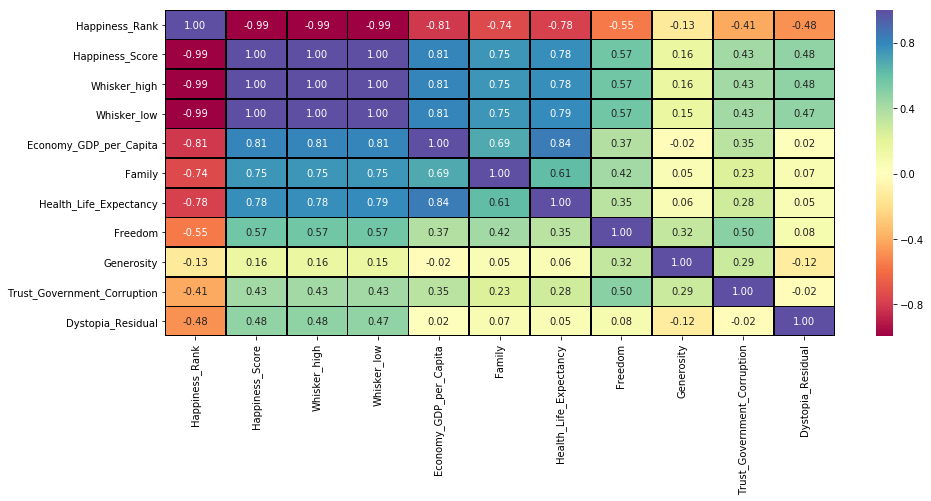

In [23]:
#Correlation Matrix of original data
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(happy_2017.corr(), annot=True, linewidths=.7, fmt= '.2f',ax=ax, cmap="Spectral",linecolor="black")

Furthermore, the Happiness_Score around the world is positively related with all the variables in the final dataset. This means that an increase in any of the variables will increase the Happiness_Score of a country to some degree. Although it is important to mention that the Economy_GDP_per_Capita has the most influence on the happiness of a country's population, followed by Health_Life_Expentancy, Family, Freedom, Dystopia Residual, Trust_Governemnt_Corruption, and Generosity repectively.

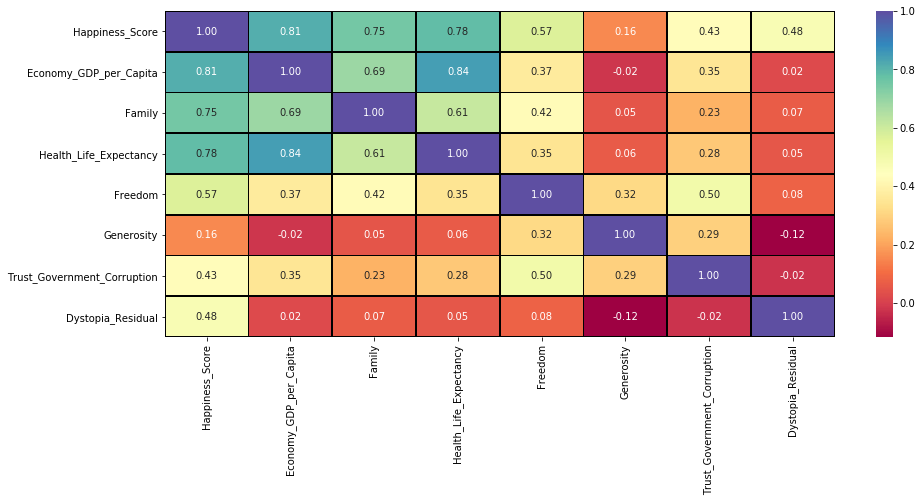

In [24]:
#Correlation Matrix working data
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(new_happiness_data.corr(), annot=True, linewidths=.7, fmt= '.2f',ax=ax, cmap="Spectral",linecolor="black")

The pairplot below visualy displays the distribution of each attribute seperately and individually in relation to all other variables. The distribution of *Happiness_Score* and *Dystopia_Residual* are symmetric, while *Economy_GDP_per_Capita*, *Generosity*, and *Trust_Governement_Corruption* are right-skewed. On the other hand, *Family*, *Health_Life_Expentancy*, and *Freedom* are left-skewed.

### Distributions and Relationships

*Figure 1.1* - Distributions and Scatter Plots

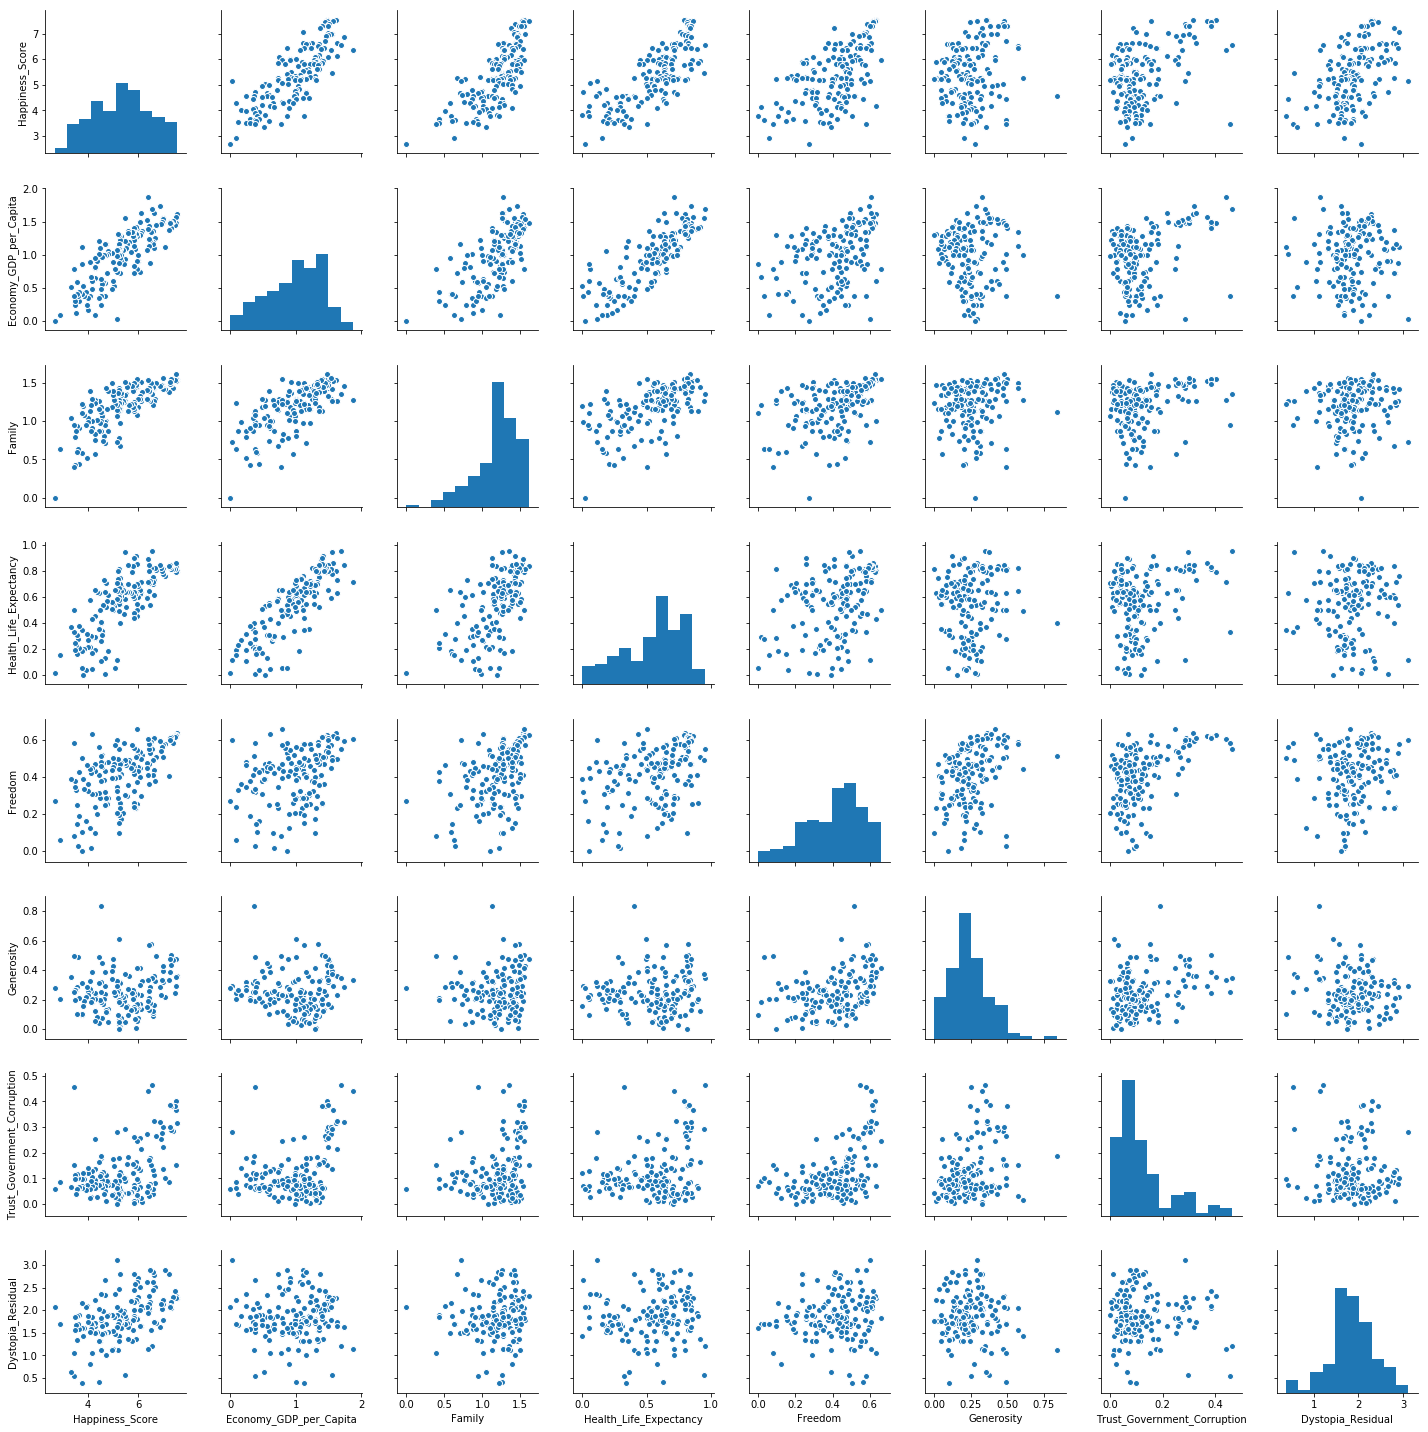

In [25]:
#Distributions and Relationships
sns.pairplot(new_happiness_data)

Using the boxplots of the variables, we are able to identify outliers in the dataset. It is apparant that *Family*, *Generosity*, *Trust_Goversment_Corruption, and *Dystopia_Residual* have outliers. Due to the small size of my dataset, I will leave them in the dataset and not remove them.

### Outlier Detection

*Figure 1.3* - Boxplots for Outlier Detection

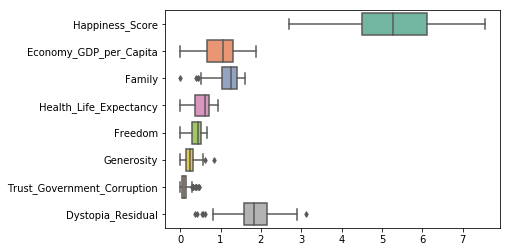

In [26]:
##Outlier Detection
sns.boxplot(data=new_happiness_data, orient="h", palette="Set2", fliersize= 4)

# 4. Data Visualization
<a id='Data Visualization'> </a>

In this section, I will brakedown and visualize different angles of the target attribute for analysis. First, I will create a heatmap of Happiness_Score accross the globe where the color spectrum goes from blue(Unhappy) to red(Very Happy). As we can notice right off the bat, the region in which a country resides has a major effect on its Happiness_Score in the dataset. For example, countries in Subsaharian Africa tend to be very Unhappy while countries in Western Europe and North America tend to be Very happy.

### World Happiness Score Heat Map

*Figure 2* - World Happiness Heat Map

In [27]:
#Plot Happiness_Score heatmap
happiness_score = happy_2017['Happiness_Score'].astype(float)

data = [dict(
        type='choropleth',
        colorscale = 'Rainbow',
        locations = happy_2017['Country'],
        z = happiness_score,
        locationmode = 'country names',
        text = happy_2017['Country'],
        colorbar = dict(
        title = 'Happiness_Score', 
        titlefont=dict(size=25),
        tickfont=dict(size=18))
)]
layout = dict(
    title = 'Happiness Score',
    titlefont = dict(size=40),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
        )
)
choromap = go.Figure(data = data, layout = layout)
iplot(choromap, validate=False)

### Happiness Score Accross Regions Bar Graph

Evidently, the barplots below show the dominance of certain regions per happiness_bin. Among the unhappy countries, Subsaharian Africa region dominates while Latin America and Caribbean countries are less prevelent. Among content countries,  Central and Eastern European countries dominate the Happiness_Score. Among the happiest countries, Western European countries dominate the Happiness_Score.

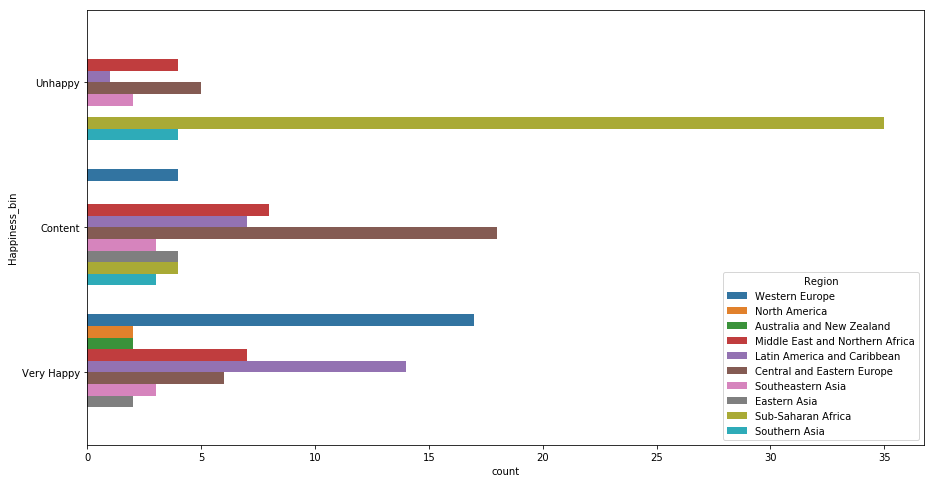

In [28]:
#Plot a  of happiness_bin accorss Regions
fig = plt.figure(figsize=(15,8))
fig.add_subplot(1,1,1)
hr = sns.countplot(y="Happiness_bin", hue="Region", data=bin_happy)

### Pie Distribution Share of Happiness Bin by Region

In [29]:
#Filter for Very_Happy Countries
filter1 = bin_happy['Happiness_bin']=='Very Happy'
very_happy_countries = bin_happy[filter1]
very_happy_countries.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeastern Asia', 'Eastern Asia'],
      dtype=object)

In [30]:
#Number count of Very Happy countries by region
very_happy_countries.Region.value_counts()

Western Europe                     17
Latin America and Caribbean        14
Middle East and Northern Africa     7
Central and Eastern Europe          6
Southeastern Asia                   3
Eastern Asia                        2
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

The pie percentage distribution of the Very Happy countries by Region.

*Figure 2.1* - Very Happy Pie

Text(0.5,1,'Distribution of the "Very Happy" Countries by Region')

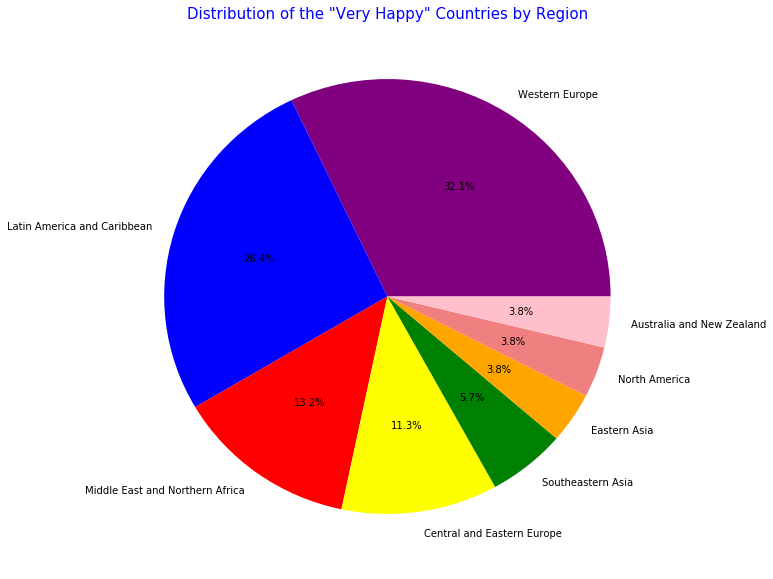

In [31]:
labels = very_happy_countries.Region.value_counts().index
colors = ['purple','blue','red','yellow','green','orange','lightcoral','pink']
explode = [0,0,0,0,0,0,0,0]
sizes = very_happy_countries.Region.value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of the "Very Happy" Countries by Region',color = 'blue',fontsize = 15)

In [32]:
#Filter for Content Countries
filter2 = bin_happy['Happiness_bin']=='Content'
content_countries = bin_happy[filter2]
content_countries.Region.unique()

array(['Central and Eastern Europe', 'Eastern Asia',
       'Latin America and Caribbean', 'Western Europe',
       'Sub-Saharan Africa', 'Middle East and Northern Africa',
       'Southeastern Asia', 'Southern Asia'], dtype=object)

In [33]:
#Number count of Content countries by region
content_countries.Region.value_counts()

Central and Eastern Europe         18
Middle East and Northern Africa     8
Latin America and Caribbean         7
Sub-Saharan Africa                  4
Western Europe                      4
Eastern Asia                        4
Southeastern Asia                   3
Southern Asia                       3
Name: Region, dtype: int64

*Figure 2.2* - Content Pie

Text(0.5,1,'Distribution of the "Content" Countries by Region')

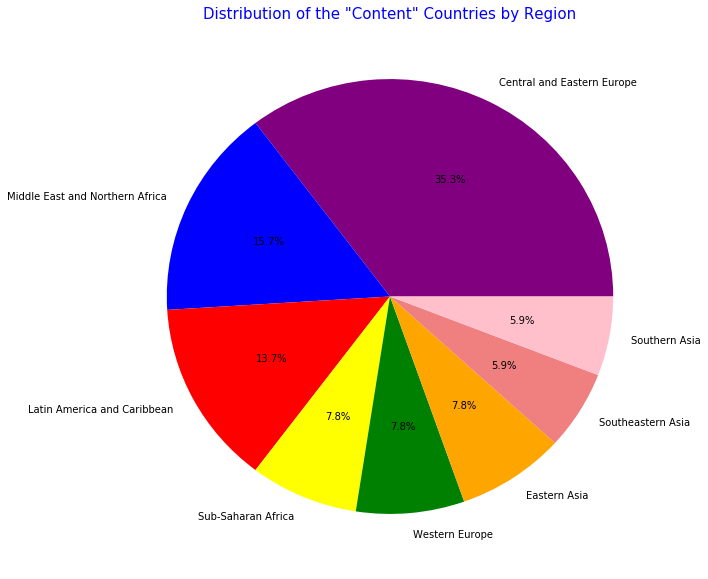

In [34]:
#Number count of Content countries by region
labels = content_countries.Region.value_counts().index
colors = ['purple','blue','red','yellow','green','orange','lightcoral','pink']
explode = [0,0,0,0,0,0,0,0]
sizes = content_countries.Region.value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of the "Content" Countries by Region',color = 'blue',fontsize = 15)

In [35]:
#Filter for Unhappy Countries
filter3 = bin_happy['Happiness_bin']=='Unhappy'
unhappy_countries = bin_happy[filter3]
unhappy_countries.Region.unique()

array(['Central and Eastern Europe', 'Sub-Saharan Africa',
       'Middle East and Northern Africa', 'Southern Asia',
       'Southeastern Asia', 'Latin America and Caribbean'], dtype=object)

In [36]:
#Number count of Unhappy countries by region
unhappy_countries.Region.value_counts()

Sub-Saharan Africa                 35
Central and Eastern Europe          5
Middle East and Northern Africa     4
Southern Asia                       4
Southeastern Asia                   2
Latin America and Caribbean         1
Name: Region, dtype: int64

*Figure 2.3* - Unhappy Pie

Text(0.5,1,'Distribution of the "Unhappy" Countries by Region')

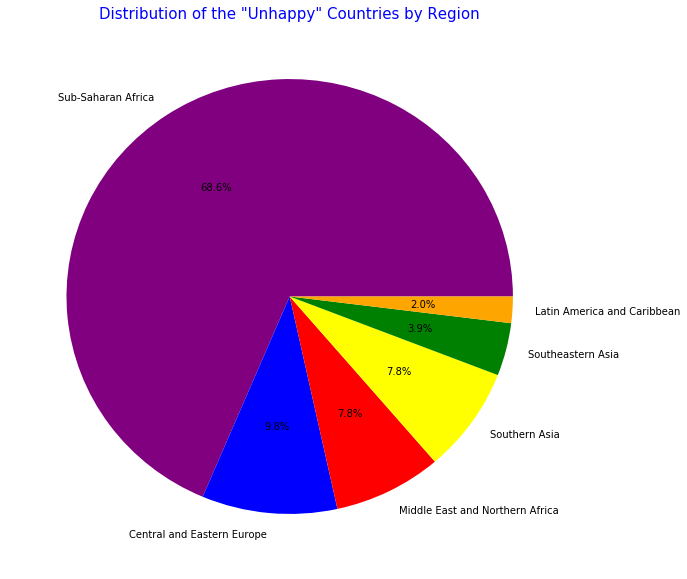

In [37]:
#Number count of Unhappy countries by region
labels = unhappy_countries.Region.value_counts().index
colors = ['purple','blue','red','yellow','green','orange']
explode = [0,0,0,0,0,0]
sizes = unhappy_countries.Region.value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of the "Unhappy" Countries by Region',color = 'blue',fontsize = 15)

# 5. Machine Learning Application
<a id='Machine Learning Application'> </a>

## Supervised Learning

### Multiple Linear Regression

Using my modified dataset of continuous variable, I attempt to predict the Happiness_Score using all other varibles as independent variables.

In [38]:
#Vew list of dataset columns
continuous_happy.columns

Index(['Happiness_Score', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Generosity',
       'Trust_Government_Corruption', 'Dystopia_Residual',
       'Region_Australia and New Zealand', 'Region_Central and Eastern Europe',
       'Region_Eastern Asia', 'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')

In [39]:
#Assign my target value
y = continuous_happy['Happiness_Score']

#Assign a dataset of independent variables without the target value
X = continuous_happy.drop(columns = ['Happiness_Score'])

In [40]:
#View independent variables
X.columns

Index(['Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Generosity', 'Trust_Government_Corruption', 'Dystopia_Residual',
       'Region_Australia and New Zealand', 'Region_Central and Eastern Europe',
       'Region_Eastern Asia', 'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')

In [41]:
#Split dataset into training(70%) and testing (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
#Import linear regression model
lr = LinearRegression()
##fit model on training
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
#Intercept
print(lr.intercept_)

0.0002356646886978453


In [43]:
#View Coefficients
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [ 1.00001320e+00  9.99834258e-01  1.00015621e+00  1.00012770e+00
  1.00022085e+00  9.99847069e-01  9.99888398e-01 -5.78342220e-05
  7.35783124e-05 -3.89054271e-05  1.53865779e-04  6.49744703e-06
  1.17502775e-05 -1.56378951e-04 -5.03894781e-05  4.85225952e-05
  9.29366670e-06]


In [44]:
#A view of coefficients associated with each independent variable.
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Economy_GDP_per_Capita,1.000013
Family,0.999834
Health_Life_Expectancy,1.000156
Freedom,1.000128
Generosity,1.000221
Trust_Government_Corruption,0.999847
Dystopia_Residual,0.999888
Region_Australia and New Zealand,-0.000058
Region_Central and Eastern Europe,0.000074
Region_Eastern Asia,-0.000039


Analysing the Coefficients weights, all of the values outside of the dummy variables for different regions have the same same weight affect on the dependent variable with a value of 1. This tells me that the original dataset may have already been fitted to a regression model in order to score countries happiness around the world. Next, I will test the performance of the model on the test set.

*Model 1 Equation* = 0.000235 + 1.000013*Economy_GDP_per_Capita* + 0.999834*Family* + 1.000156 *Health_Life_Expectancy* + 1.000128*Freedom* + 1.000221*Generosity* + 0.999847 *Trust_Government_Corruption* + 0.999888*Dystopia_Residual* - 0.000058* Region_Australia and New Zealand* + 0.000074*Region_Central and Eastern Europe* -0.000039*Region_Eastern Asia* + 0.000154*Region_Latin America and Caribbean* + 0.000006*Region_Middle East and Northern Africa* + 0.000012*Region_North America* - 0.000156*Region_Southeastern Asia* - 0.000050*Region_Southern Asia* + 0.000049*Region_Sub-Saharan Africa* + 0.000009*Region_Western Europe

In [45]:
predictions = lr.predict( X_test)

Text(0,0.5,'Predicted Y')

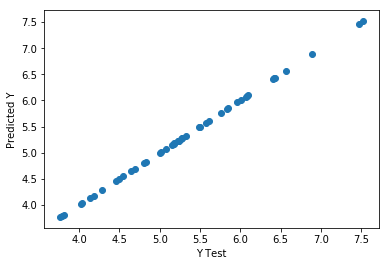

In [46]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

The Model performance is perfectly linear and therefore reaffirming my assumption above. As you can see below, the error metrics on the model are amlmost non-existent(0 error).

In [47]:
from sklearn import metrics
print('Method is Linear Regression')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Method is Linear Regression
MAE: 0.0002815065243764653
MSE: 1.0684522135930392e-07
RMSE: 0.0003268718730011867


Next, I use k-fold validation to further evaluate the effectiveness of my model through accuracy. As a result, t predicted accuracy is almost perfect as well.

Cross-validated scores: [0.9999994  0.99999658 0.99999525 0.99999812 0.99999933]
Cross-Predicted Accuracy: 0.9999999151284636


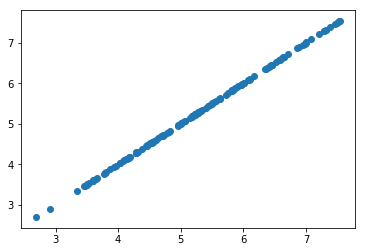

In [48]:
# K-Fold Validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print ('Cross-validated scores:', scores)

# Make cross validated predictions
predictions = cross_val_predict(LinearRegression(), X, y, cv=5)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

At this point, I've discovered that multiple linear regression is the best predictor of a country's happiness. Nevertheless, I will continue to use other methods to try to improve the model performance and compare with the performance of other models.

### Multiple Linear Regression (With Feature Selection)

In [49]:
# With feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
featureSelection = SelectFromModel(estimator)
featureSelection.fit(X, y)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        norm_order=1, prefit=False, threshold=None)

Here I use feature selection to have the model only include significant variable. Meaning that I will build a smaller model with fewer variables that ia able to predict as well as the model with all the variables.

In [50]:
selectedFeatures = featureSelection.transform(X)
selectedFeatures

array([[1.61646318, 1.53352356, 0.7966665 , ..., 0.36201224, 0.31596384,
        2.27702665],
       [1.48238301, 1.55112159, 0.79256552, ..., 0.35528049, 0.40077007,
        2.31370735],
       [1.48063302, 1.61057401, 0.83355212, ..., 0.47554022, 0.15352656,
        2.32271528],
       ...,
       [0.51113588, 1.0419898 , 0.36450928, ..., 0.35425636, 0.06603511,
        0.62113047],
       [0.09162257, 0.62979358, 0.15161079, ..., 0.20443518, 0.08414795,
        1.68302417],
       [0.        , 0.        , 0.01877269, ..., 0.28087649, 0.05656508,
        2.06600475]])

In [51]:
#Significant features for newer model
X.columns[featureSelection.get_support()]

Index(['Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Generosity', 'Trust_Government_Corruption', 'Dystopia_Residual'],
      dtype='object')

In [52]:
#Create a new dataset of independent variables using features selected
X = continuous_happy[['Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Generosity', 'Trust_Government_Corruption', 'Dystopia_Residual']]

In [53]:
#Improve Linear Model through feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#Intercept
print(lr.intercept_)

0.00021834439889723


In [55]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Economy_GDP_per_Capita,1.000016
Family,0.999884
Health_Life_Expectancy,1.000109
Freedom,1.000070
Generosity,1.000102
Trust_Government_Corruption,0.999772
Dystopia_Residual,0.999935


After the feature selection application, all variable weights remain more or less unchanged but is much learner and easier to interpret than the first model.

Model 2 Equation = 0.000218 + 1.000016Economy_GDP_per_Capita + 0.999884Family + 1.000109 Health_Life_Expectancy + 1.000070Freedom + 1.000102Generosity + 0.999772 Trust_Government_Corruption + 0.999935Dystopia_Residual.

In [56]:
predictions = lr.predict( X_test)

Text(0,0.5,'Predicted Y')

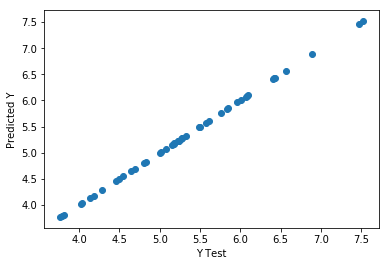

In [57]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

The error is globally the same and did not change much from the first model.

In [58]:
print('Method is Linear Regression with Feature Selection')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Method is Linear Regression with Feature Selection
MAE: 0.00028048669416593457
MSE: 1.0037689107079472e-07
RMSE: 0.0003168231226896085


The accuracy compared to the first model is also very similar.

Cross-validated scores: [0.99999952 0.99999737 0.99999628 0.99999831 0.99999934]
Cross-Predicted Accuracy: 0.9999999309505133


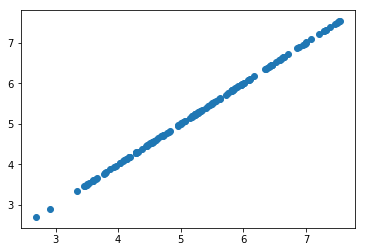

In [59]:
# K-Fold Validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print ('Cross-validated scores:', scores)

# Make cross validated predictions
predictions = cross_val_predict(LinearRegression(), X, y, cv=6)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

### Ridge Regression

Here I experiment with penalising the model in hopes of reducing variance of the parameter estimates and elimainate as much collinearity as possible using Ridge regression. The ridge regression model should assure that the data is not overfitted.

In [60]:
#Ridge Regression with the optimal features
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
print(ridge.intercept_)

0.29112654026531626


In [62]:
coeffecients = pd.DataFrame(ridge.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Economy_GDP_per_Capita,1.124120
Family,0.971614
Health_Life_Expectancy,0.795091
Freedom,0.863201
Generosity,0.744885
Trust_Government_Corruption,0.607505
Dystopia_Residual,0.950285


With Ridge regression, the interesting thing is almost all the weights of variables decreased as expected except for the Economy_GDP_per_Capita whose weight increased. Additionally, the intercept also increased compared to the previous 2 models.

Model 3 Equation = 0.291126 + 1.124120Economy_GDP_per_Capita + 0.971614Family + 0.795091 Health_Life_Expectancy + 0.863201Freedom + 0.744885Generosity + 0.607505 Trust_Government_Corruption + 0.950285Dystopia_Residual.

In [63]:
predictions = ridge.predict( X_test)

Text(0,0.5,'Predicted Y')

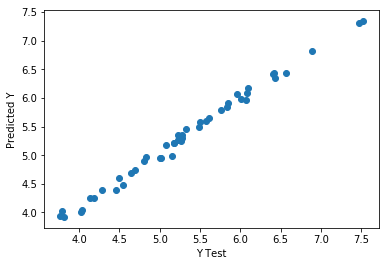

In [64]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Compared to the first 2 models, the ridge regression model performed better on MSE but worse on RMSE and MAE.

In [65]:
print('Method is Ridge Regression')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Method is Ridge Regression
MAE: 0.0759839617707886
MSE: 0.008488576941891828
RMSE: 0.09213347351474288


Compared to the first 2 models, the ridge regression model performed less on accuracy.

Cross-validated scores: [0.56354766 0.94846975 0.86066884 0.89743481 0.92261616]
Cross-Predicted Accuracy: 0.9869134270464734


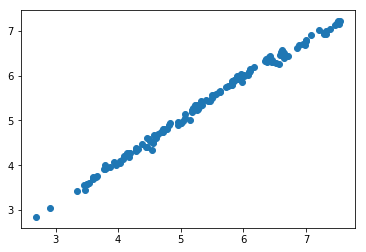

In [66]:
# K-Fold Validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
scores = cross_val_score(Ridge(), X, y, cv=5)
print ('Cross-validated scores:', scores)

# Make cross validated predictions
predictions = cross_val_predict(Ridge(), X, y, cv=5)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

### Decision Tree Classification

In this section, I try to build 3 decision tree models that can be used to predict whether a country is Very Happy, Content, and Unhappy in the dataset. I will use the binned data that discretized the the Happiness_Score into 3 bins. Additionally, I will create a dummy variable column for each bin for the purpose of running the classification algorithm on my data.

In [67]:
happy_data = pd.get_dummies(bin_happy)
happy_data.head()

,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Happiness_Score,Region_Australia and New Zealand,Region_Central and Eastern Europe,...,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Happiness_bin_Unhappy,Happiness_bin_Content,Happiness_bin_Very Happy
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,7.537,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,7.522,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,7.504,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,7.494,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,7.469,0,0,...,0,0,0,0,0,0,1,0,0,1


In [68]:
#Decision Tree for predicting a very happy country

y = happy_data['Happiness_bin_Very Happy']
X = happy_data.drop(columns = ['Happiness_bin_Very Happy','Happiness_bin_Content','Happiness_bin_Unhappy','Happiness_Score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
#Tree classifier object using gini index impurity
tree_clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=2,splitter='best')
#Fit training data
tree_clf = tree_clf.fit(X_train, y_train)
#Predict on testing
tree_pred_test = tree_clf.predict(X_test)
#Model performance
train_score = tree_clf.score(X_train, y_train)
test_score = tree_clf.score(X_test, y_test)
print("Training score: " + str(train_score))
print("Testing score: " + str(test_score))
print(classification_report(y_test, tree_pred_test))

#K-fold Validation

tree_cv_scores = cross_validation.cross_val_score(tree_clf, X, y, cv=5)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (tree_cv_scores.mean(), tree_cv_scores.std() * 2))

export_graphviz(tree_clf,out_file='census_tree.dot', feature_names=X_train.columns,
                          rounded=True, filled=True, special_characters=True)


Training score: 1.0
Testing score: 0.851063829787234
             precision    recall  f1-score   support

          0       0.97      0.83      0.89        35
          1       0.65      0.92      0.76        12

avg / total       0.89      0.85      0.86        47

Overall Accuracy: 0.82 (+/- 0.11)


In [70]:
X.columns

Index(['Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Generosity', 'Trust_Government_Corruption', 'Dystopia_Residual',
       'Region_Australia and New Zealand', 'Region_Central and Eastern Europe',
       'Region_Eastern Asia', 'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')

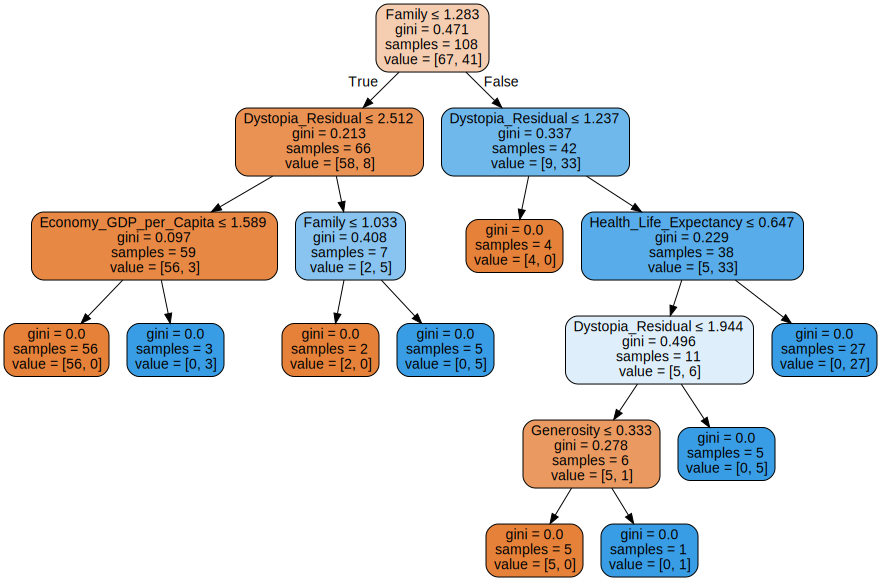

In [71]:
#Decision Tree visualization
with open("census_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [72]:
system(dot -Tpng census_tree.dot -o dtree.png)

[]

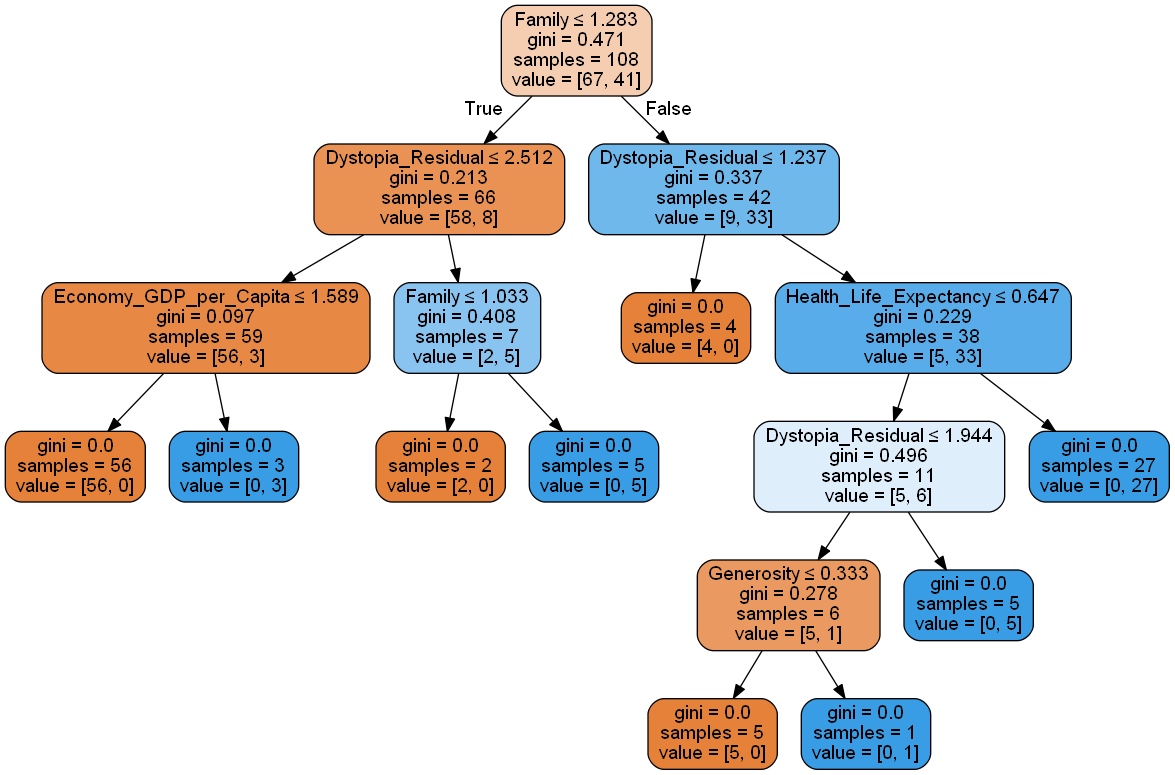

In [73]:
from IPython.display import Image
Image(filename='dtree.png', width=800)

The decision tree for predicting Very Happy countries has Family as the best predictor. However the tree performed well on training and poorly on testing and therefore overfitted. The overall accuracy of the tree in predicting Very Happy countries is 82%.

In [74]:
#Decision Tree for predicting a Content country
y = happy_data['Happiness_bin_Content']
X = happy_data.drop(columns = ['Happiness_bin_Very Happy','Happiness_bin_Content','Happiness_bin_Unhappy','Happiness_Score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [75]:
tree_clf = tree.DecisionTreeClassifier(criterion='gini',splitter='best')
tree_clf = tree_clf.fit(X_train, y_train)
tree_pred_test = tree_clf.predict(X_test)
train_score = tree_clf.score(X_train, y_train)
test_score = tree_clf.score(X_test, y_test)
print("Training score: " + str(train_score))
print("Testing score: " + str(test_score))
print(classification_report(y_test, tree_pred_test))

tree_cv_scores = cross_validation.cross_val_score(tree_clf, X, y, cv=5)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (tree_cv_scores.mean(), tree_cv_scores.std() * 2))

export_graphviz(tree_clf,out_file='census_tree.dot', feature_names=X_train.columns,
                          rounded=True, filled=True, special_characters=True)

Training score: 1.0
Testing score: 0.6808510638297872
             precision    recall  f1-score   support

          0       0.65      0.88      0.75        25
          1       0.77      0.45      0.57        22

avg / total       0.70      0.68      0.66        47

Overall Accuracy: 0.66 (+/- 0.22)


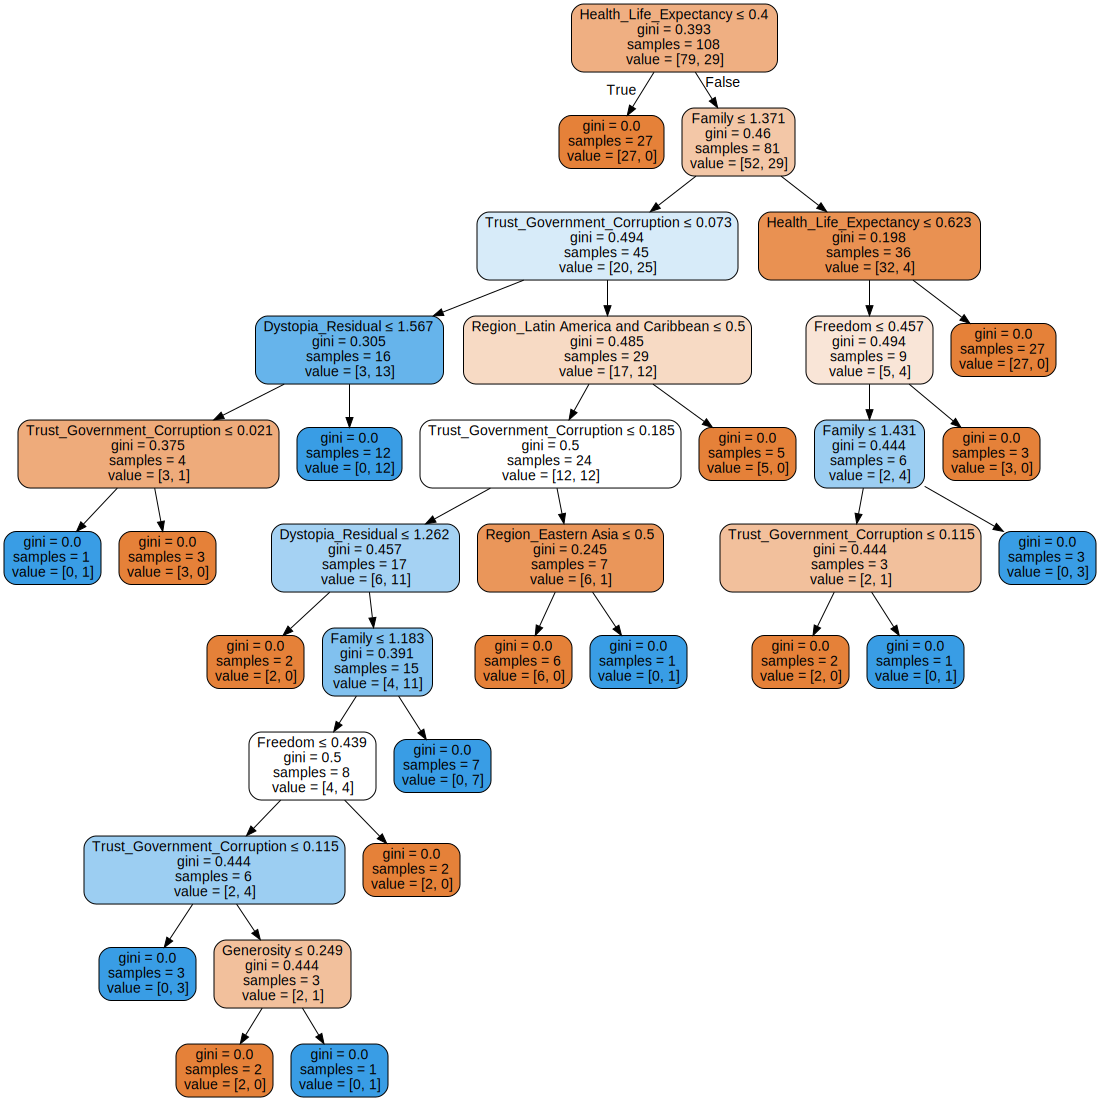

In [76]:
with open("census_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [77]:
system(dot -Tpng census_tree.dot -o dtree.png)

[]

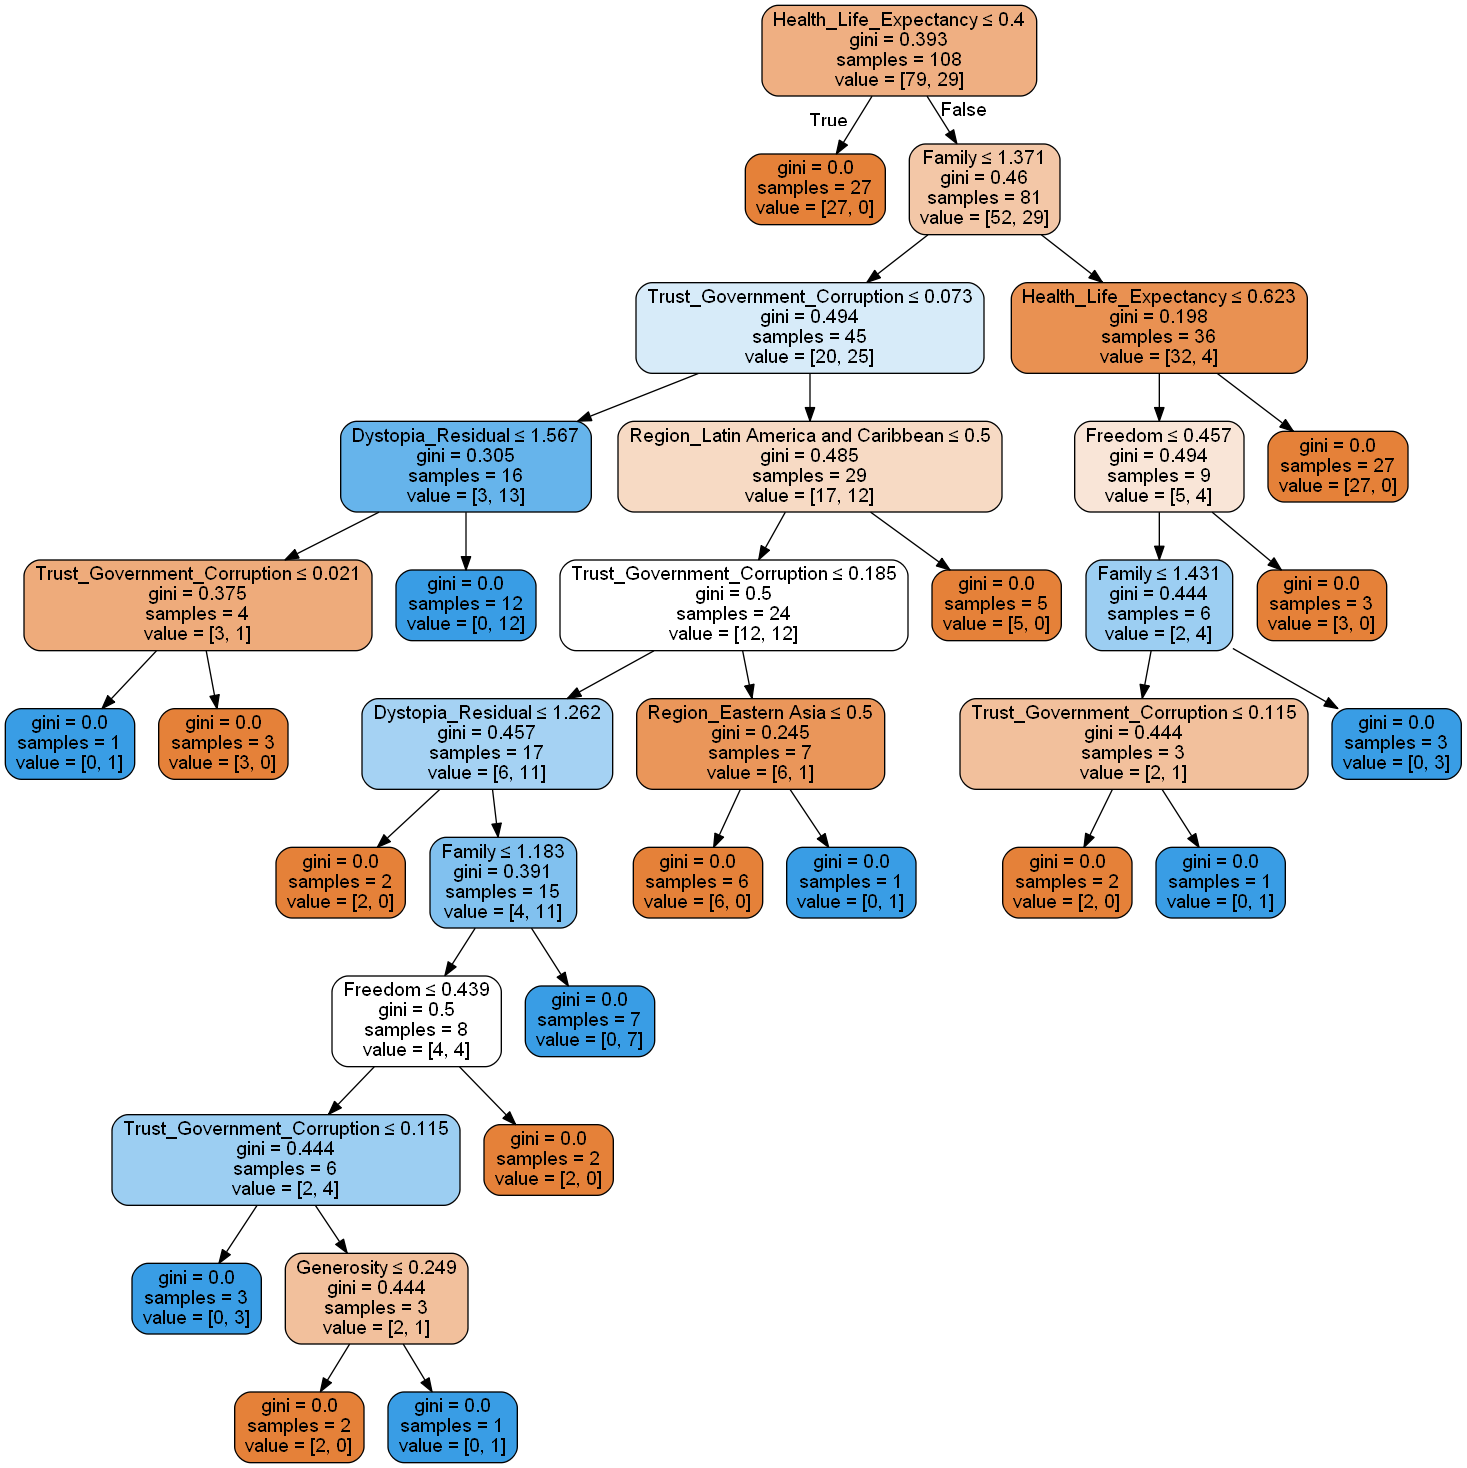

In [78]:
from IPython.display import Image
Image(filename='dtree.png', width=800)

The decision tree for predicting Content countries has Health_Life_Expectancy as the best predictor. However the tree performed well on training and poorly on testing and therefore overfitted.The overall accuracy of the tree in predicting Content countries is 66%.

In [79]:
#Decision Tree for predicting a Unhappy country
y = happy_data['Happiness_bin_Unhappy']
X = happy_data.drop(columns = ['Happiness_bin_Very Happy','Happiness_bin_Content','Happiness_bin_Unhappy','Happiness_Score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
tree_clf = tree.DecisionTreeClassifier(criterion='gini',splitter='best')
tree_clf = tree_clf.fit(X_train, y_train)
tree_pred_test = tree_clf.predict(X_test)
train_score = tree_clf.score(X_train, y_train)
test_score = tree_clf.score(X_test, y_test)
print("Training score: " + str(train_score))
print("Testing score: " + str(test_score))
print(classification_report(y_test, tree_pred_test))

tree_cv_scores = cross_validation.cross_val_score(tree_clf, X, y, cv=5)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (tree_cv_scores.mean(), tree_cv_scores.std() * 2))

export_graphviz(tree_clf,out_file='census_tree.dot', feature_names=X_train.columns,
                          rounded=True, filled=True, special_characters=True)

Training score: 1.0
Testing score: 0.9148936170212766
             precision    recall  f1-score   support

          0       0.94      0.94      0.94        34
          1       0.85      0.85      0.85        13

avg / total       0.91      0.91      0.91        47

Overall Accuracy: 0.92 (+/- 0.09)


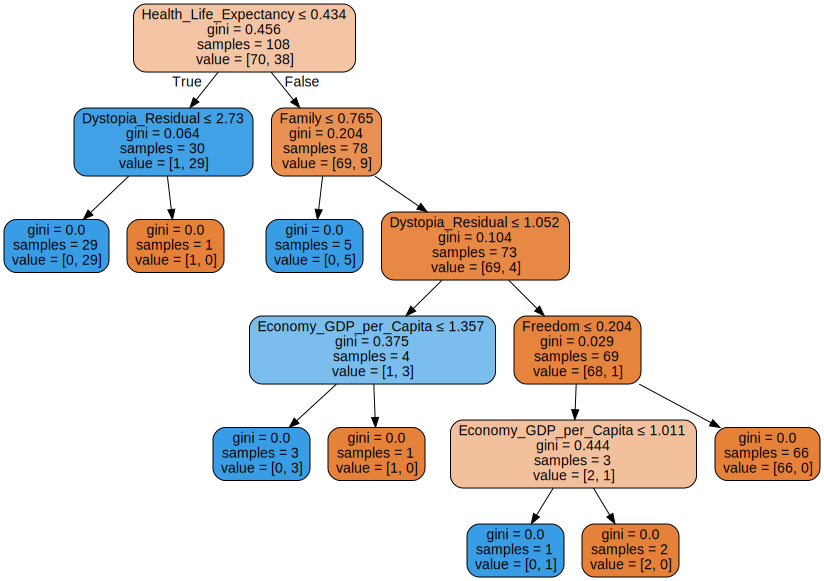

In [81]:
with open("census_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [82]:
system(dot -Tpng census_tree.dot -o dtree.png)

[]

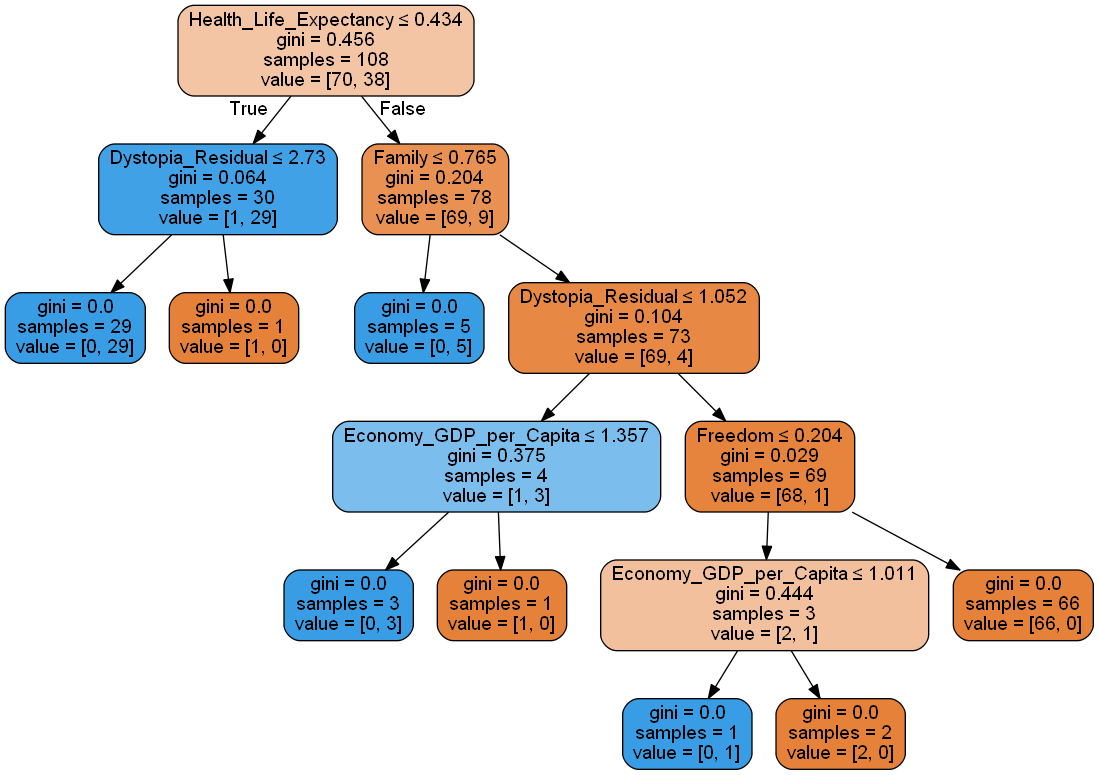

In [83]:
from IPython.display import Image
Image(filename='dtree.png', width=800)

The decision tree for predicting Unhappy countries has Health_Life_Expectancy as the best predictor. However the tree performed well on training and testing and therefore is not too overfitted like the previous 2. The overall accuracy of the tree in predicting  Unhappy countries is 92%.

Among all the supervised learning algorithms for prediction, the second model of multiple regression with feature selection rendered the best performance overall on error and accuracy. Additionaly, it is best for interpretability among all supervised learning models, including the decision trees. 

Best Supervised learning Model for Prediction:  0.000218 + 1.000016Economy_GDP_per_Capita + 0.999884Family + 1.000109 Health_Life_Expectancy + 1.000070Freedom + 1.000102Generosity + 0.999772 Trust_Government_Corruption + 0.999935Dystopia_Residual. 

## Unsupervised Learning

With unsupervised learning, I will remove all labels from my data and apply K-means clustering in order to learn the relationships in my data without any real objective. In order to improve my model performance, I will apply z-score normalization to my original data to avoid different variable from dominating others and pca in order to create other new variable that are uncorrelated. 

### K-Means Clustering (Original Data)

In [84]:
#Original
new_happiness_data

,Region,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
0,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Western Europe,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,North America,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,Australia and New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Western Europe,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia and New Zealand,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [85]:
#Import Original data matrix
data = pd.read_csv('2017_matrix.csv', header=None)

In [86]:
data.shape

(155, 8)

In [87]:
new_happiness_data.iloc[:0]

,Region,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual


In [88]:
features = new_happiness_data.iloc[:0,1:]

In [89]:
features.T

""
Happiness_Score
Economy_GDP_per_Capita
Family
Health_Life_Expectancy
Freedom
Generosity
Trust_Government_Corruption
Dystopia_Residual


In [90]:
target = pd.qcut(new_happiness_data.Happiness_Score, [0, .33, .66, 1], labels=["2", "1", "0"])

In [91]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Happiness_Score, dtype: category
Categories (3, object): [2 < 1 < 0]

In [92]:
target.shape

(155,)

In [93]:
target = np.array(target)
data = np.array(data)
features = np.array(features)

In [94]:
#Kmeans with k=3
kmeans = KMeans(n_clusters=3, max_iter=500, verbose=1)

In [95]:
kmeans.fit(data)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 106.77062779978235
start iteration
done sorting
end inner loop
Iteration 1, inertia 96.34152483068037
start iteration
done sorting
end inner loop
Iteration 2, inertia 90.65485148176174
start iteration
done sorting
end inner loop
Iteration 3, inertia 89.44783125307534
start iteration
done sorting
end inner loop
Iteration 4, inertia 88.81955424563719
start iteration
done sorting
end inner loop
Iteration 5, inertia 88.71143198820626
start iteration
done sorting
end inner loop
Iteration 6, inertia 88.68330619453727
start iteration
done sorting
end inner loop
Iteration 7, inertia 88.6519214753225
start iteration
done sorting
end inner loop
Iteration 8, inertia 88.59286174924577
start iteration
done sorting
end inner loop
Iteration 9, inertia 88.55006372073709
start iteration
done sorting
end inner loop
Iteration 10, inertia 88.39243788267612
start iteration
done sorting
end inner loop
Iteration 11, iner

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [96]:
clusters = kmeans.predict(data)

In [97]:
#view clusters
print (clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [98]:
centers = kmeans.cluster_centers_
centers

array([[4.05604   , 0.56031809, 0.91140968, 0.30428638, 0.33035087,
        0.2528954 , 0.09824448, 1.59847488],
       [6.83955263, 1.40504779, 1.43006618, 0.76686776, 0.53901124,
        0.31274891, 0.21076866, 2.17498642],
       [5.48011941, 1.06303881, 1.2591963 , 0.61347056, 0.39346052,
        0.20504044, 0.09197315, 1.8539348 ]])

In [99]:
clusters.shape

(155,)

In [100]:
target.shape

(155,)

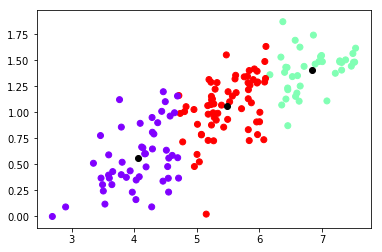

In [101]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

In [102]:
print (completeness_score(target,clusters))

0.7803776021502634


In [103]:
print (homogeneity_score(target,clusters))

0.7617130615786061


The clustering algorithm performance is ok. The homogeneity score of .76/1 is the level of which clusters contain only data points which are members of a single class. On the other hand, the completenes score of .78/1 indicates the level of which data points that are members of a given class are elements of the same cluster.

### K-Means Clustering (with Z-score Normalization)

With z-score normalization, I'm hoping to reduce the dominance of variables in clustering.

In [104]:
#Transform z_happy data into np array
z_happy = np.array(z_happy)
z_happy

array([[ 1.92974077,  1.50132112,  1.19968779, ...,  0.85419543,
         1.89693546,  0.85352928],
       [ 1.91648056,  1.18268401,  1.26094886, ...,  0.80424936,
         2.73114484,  0.92688652],
       [ 1.90056899,  1.17852521,  1.46791054, ...,  1.69651389,
         0.29909656,  0.94490135],
       ...,
       [-1.77242402, -1.12545278, -0.5114059 , ...,  0.79665088,
        -0.56152638, -2.45807525],
       [-2.16491712, -2.12241233, -1.94631518, ..., -0.31494416,
        -0.3833567 , -0.33440831],
       [-2.35232364, -2.34015034, -4.13870952, ...,  0.25221045,
        -0.65467978,  0.43150942]])

In [105]:
#fit z_happy
kmeans.fit(z_happy)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 674.2373287271646
start iteration
done sorting
end inner loop
Iteration 1, inertia 655.9586491766554
start iteration
done sorting
end inner loop
Iteration 2, inertia 654.3740720803396
start iteration
done sorting
end inner loop
Iteration 3, inertia 654.3740720803396
center shift 0.000000e+00 within tolerance 9.935484e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 753.5900382493384
start iteration
done sorting
end inner loop
Iteration 1, inertia 678.4678462412937
start iteration
done sorting
end inner loop
Iteration 2, inertia 656.9066575010288
start iteration
done sorting
end inner loop
Iteration 3, inertia 656.2024781635212
start iteration
done sorting
end inner loop
Iteration 4, inertia 655.8258273222125
start iteration
done sorting
end inner loop
Iteration 5, inertia 655.8258273222125
center shift 0.000000e+00 within tolerance 9.935484e-05
Initializa

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [106]:
clusters = kmeans.predict(z_happy)

In [107]:
print (clusters)

[1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 2 2 2 0 2 0
 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


In [108]:
kmeans.cluster_centers_

array([[ 0.22850066,  0.28227944,  0.33301145,  0.38296089, -0.06847087,
        -0.35454483, -0.44541359,  0.11320537],
       [ 1.33933498,  1.24125893,  0.89423269,  0.98702422,  1.11799715,
         0.85917595,  1.69942139,  0.09126454],
       [-1.11106798, -1.14869515, -1.04633286, -1.18088461, -0.49003719,
         0.13290742, -0.16888448, -0.24046902]])

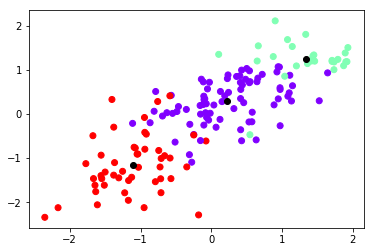

In [109]:
#plot the normalized data clustering
plt.scatter(z_happy[:,0], z_happy[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

In [110]:
#Completeness Score
print (completeness_score(target,clusters))

0.5110562518126188


In [111]:
#Homogeneity Score
print (homogeneity_score(target,clusters))

0.46601113074371336


The clustering algorithm performance is not good compared to the first. The homogeneity score of .46/1 is the level of which clusters contain only data points which are members of a single class. On the other hand, the completenes score of .51/1 indicates the level of which data points that are members of a given class are elements of the same cluster.

### K-Means Clustering (PCA)

With PCA applied to the normalised data, I'm hoping to reduce the dimension of my data set and still be able to capture most of the variance.

In [112]:
#PCA Application

pca = decomposition.PCA(n_components=8)
DTtrans = pca.fit(data).transform(data)

In [113]:
np.set_printoptions(precision=2,suppress=True)
print (DTtrans)

[[-2.36  0.01  0.11 ...  0.06  0.04  0.  ]
 [-2.32  0.09  0.2  ...  0.03  0.15 -0.  ]
 [-2.32  0.08  0.22 ...  0.08 -0.09 -0.  ]
 ...
 [ 2.25 -0.85  0.24 ... -0.03 -0.04  0.  ]
 [ 2.69  0.38 -0.08 ...  0.05  0.12 -0.  ]
 [ 2.95  0.89 -0.23 ...  0.01 -0.05  0.  ]]


In [114]:
print(pca.explained_variance_ratio_)

[0.82 0.13 0.02 0.02 0.01 0.01 0.   0.  ]


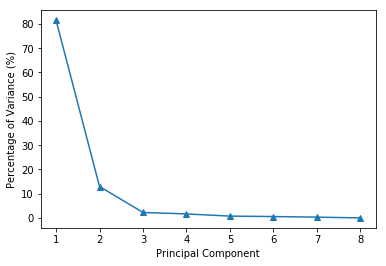

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 9), pca.explained_variance_ratio_*100, marker='^')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance (%)')
plt.show()

In [116]:
pc = 0
total_var = 0
for i in pca.explained_variance_ratio_:
    pc += 1
    total_var += i*100
    print("Variance captured by PC " + str(pc) + ": " + str(total_var))

Variance captured by PC 1: 81.51490175485164
Variance captured by PC 2: 94.467944242639
Variance captured by PC 3: 96.71984230842925
Variance captured by PC 4: 98.36525309015927
Variance captured by PC 5: 99.11515390293235
Variance captured by PC 6: 99.67858787813566
Variance captured by PC 7: 99.99999948539896
Variance captured by PC 8: 99.99999999999999


According to the plot above, 8 principal components capture the highest level of variations in the dataset. These are the same variables that were using in the multiple regression ealier. 

In [117]:
kmeans.fit(DTtrans)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 103.2324815987534
start iteration
done sorting
end inner loop
Iteration 1, inertia 91.14938278991232
start iteration
done sorting
end inner loop
Iteration 2, inertia 89.53596026170237
start iteration
done sorting
end inner loop
Iteration 3, inertia 88.88543901930854
start iteration
done sorting
end inner loop
Iteration 4, inertia 88.63387440975448
start iteration
done sorting
end inner loop
Iteration 5, inertia 88.6028766320745
start iteration
done sorting
end inner loop
Iteration 6, inertia 88.48107494460487
start iteration
done sorting
end inner loop
Iteration 7, inertia 88.19520707060398
start iteration
done sorting
end inner loop
Iteration 8, inertia 87.77525894482518
start iteration
done sorting
end inner loop
Iteration 9, inertia 87.73290362696255
start iteration
done sorting
end inner loop
Iteration 10, inertia 87.57824796444248
start iteration
done sorting
end inner loop
Iteration 11, inert

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [118]:
pca_clusters = kmeans.predict(DTtrans)

In [119]:
pca_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

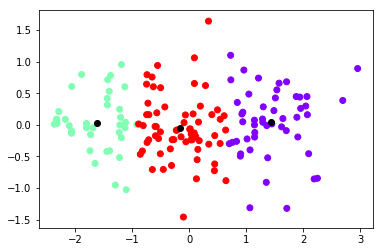

In [120]:
plt.scatter(DTtrans[:,0], DTtrans[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 

In [121]:
print (completeness_score(target,pca_clusters))

0.7803776021502634


In [122]:
print (homogeneity_score(target,pca_clusters))

0.7617130615786061


As expected, clustering algorithm with PCA performance is the same as the clustering on the same data. The homogeneity score of .76/1 is the level of which clusters contains only data points which are members of a single class. On the other hand, the completenes score of .78/1 indicates the level of which data points that are members of a given class are elements of the same cluster.

# 6. Conclusion
<a id='Conclusion'> </a>

In conclusion, I was able  to learn a lot from analysing the world happiness data that was posted on kaggle by the Sustainable Development Solutions Network. I satisfied both my curiosity as to what the relationships between the dataset variables were as I obtained them and also raised questions on the credibility of the dataset along the way. Through my analysis, I proved that the original dataset itself may not have been a true representation of the countries it described as the dataset itself was fitted beforehand to some regression algorithm (possibly model 2) that had a perfect linear relationship with the Happiness_Score. As a mather of fact, multiple regression was the best performing model compared to the supervised methods of using decision trees for categorical prediction and unsupervised models using k-means. Furthermore, there is  a good potential of bias in this dataset that has to do with the way the Happiness_score was produced to favor countries in Western Europe on the contrary to those in Sub-Saharian Africa. As a result, I am now more curious precisely about how the variables were chosen and how the data points were calculated or in other words, what factors and transformations were done to the dataset to obtain the final values. 